<a href="https://colab.research.google.com/github/Heisnotanimposter/LargeEconomicModel/blob/main/RagVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install selenium
!pip install textblob
!pip install seaborn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


Fetching data from https://tradingeconomics.com/country-list/gdp...
Data for GDP successfully scraped!
Fetching data from https://tradingeconomics.com/country-list/inflation-rate...
Data for Inflation Rate successfully scraped!
Fetching data from https://tradingeconomics.com/country-list/unemployment-rate...
Data for Unemployment Rate successfully scraped!
Fetching data from https://tradingeconomics.com/country-list/interest-rate...
Data for Interest Rate successfully scraped!
Fetching data from https://tradingeconomics.com/country-list/government-debt-to-gdp...
Data for Government Debt successfully scraped!

GDP Data Columns and Data Types:
Country      object
Last         object
Previous     object
Reference    object
 Unit        object
dtype: object
         Country  Last  Previous  Reference         Unit
0  United States  27361     25744    Dec/23  USD Billion
1          China  17795     17882    Dec/23  USD Billion
2      Euro Area  15545     14224    Dec/23  USD Billion
3       

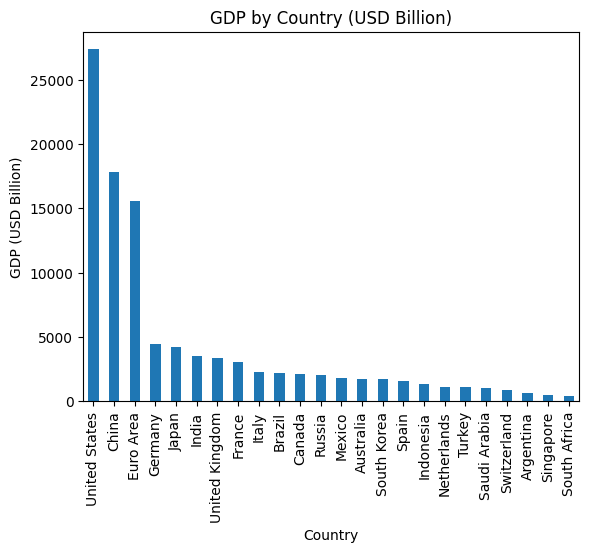

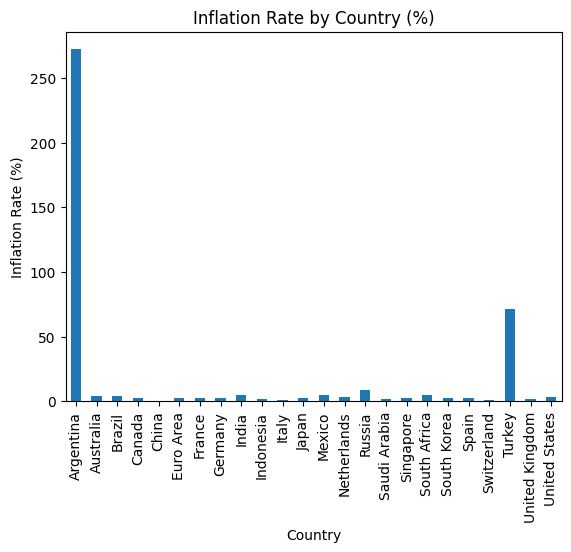

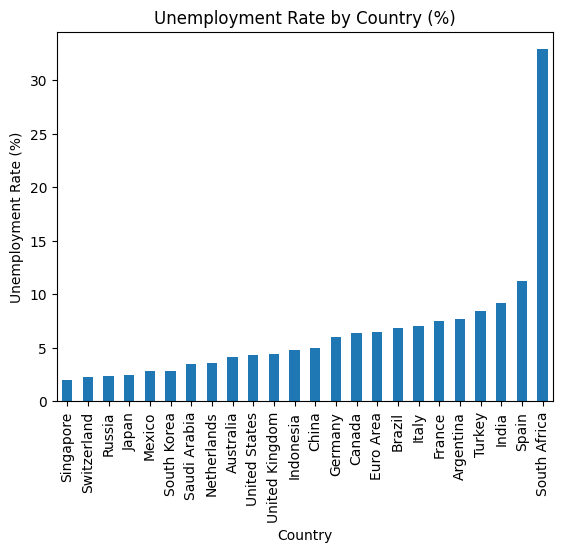

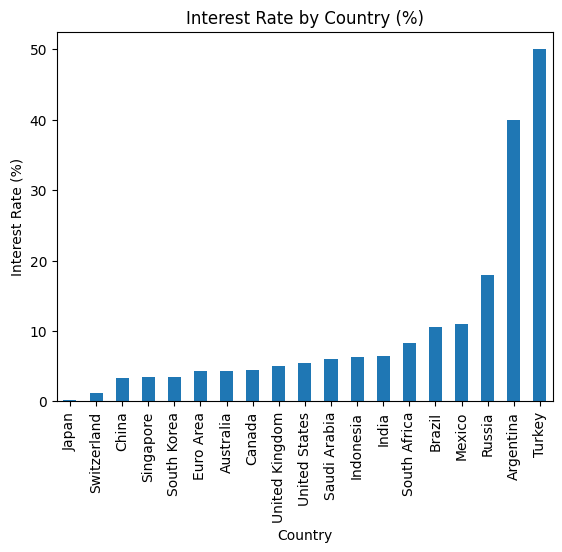

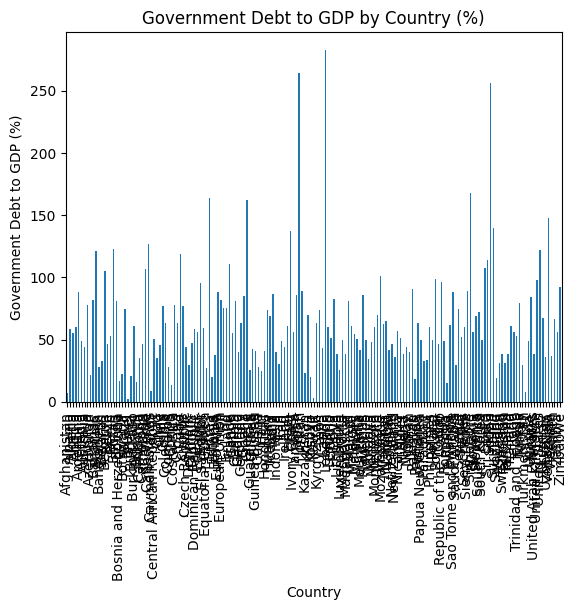

                                            Headline  Polarity  Subjectivity
0    'Desperation' behind sharp rise in energy theft   -0.2625         0.725
1    Stock markets plunge as weak US jobs fuel fears   -0.3750         0.625
2  TikTok sued for 'massive' invasion of child pr...    0.0000         1.000
3     Rolls-Royce to give each worker £700 in shares    0.0000         0.000
4  Whisper it, but is now a good time to holiday ...    0.7000         0.600


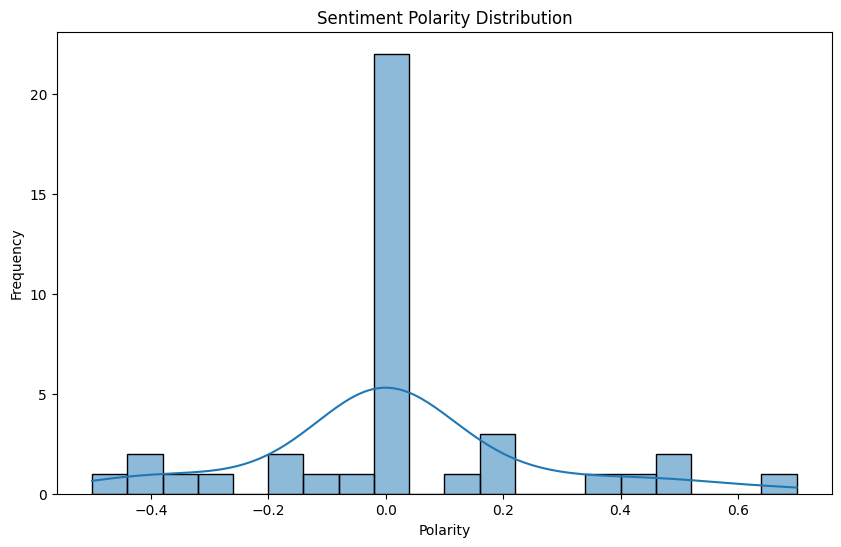

<ipython-input-18-f2579c3b38e7>:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RAG_Status', data=news_df, palette=['red', 'orange', 'green'])


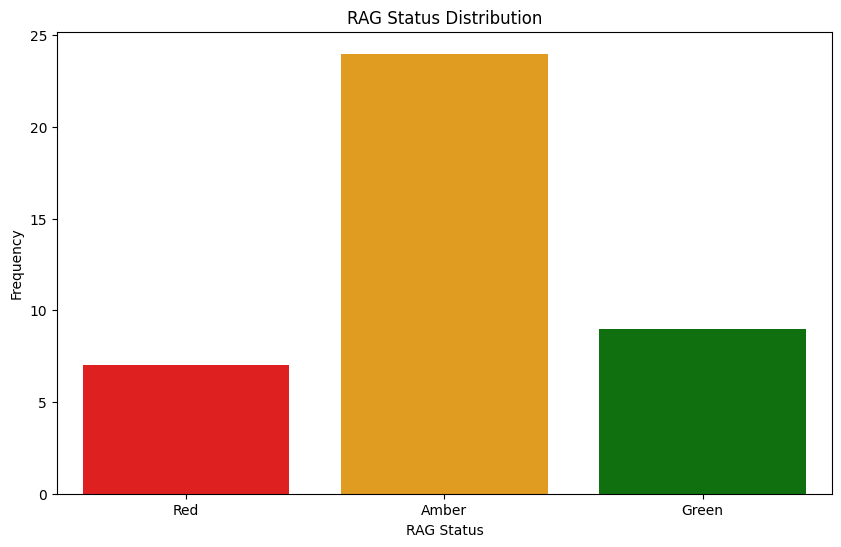


Features (X):
   Polarity  Subjectivity
0   -0.2625         0.725
1   -0.3750         0.625
2    0.0000         1.000
3    0.0000         0.000
4    0.7000         0.600

Target (y):
0    0
1    0
2    1
3    1
4    1
Name: Sentiment, dtype: int64
Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


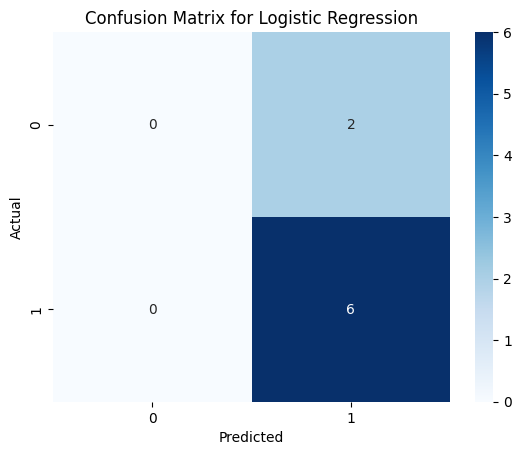

Random Forest Accuracy: 0.875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8

Gradient Boosting Accuracy: 0.875
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



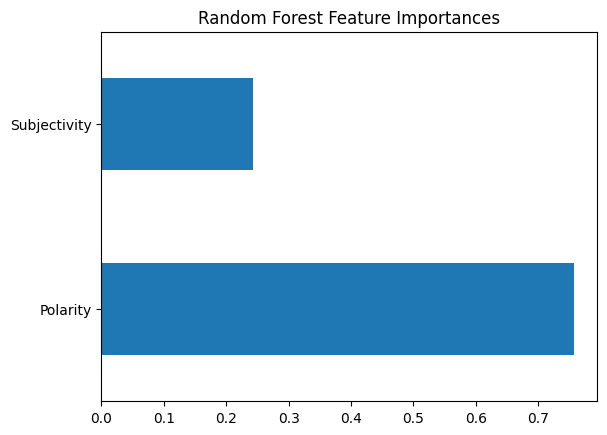

Voting Classifier Accuracy: 0.875
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



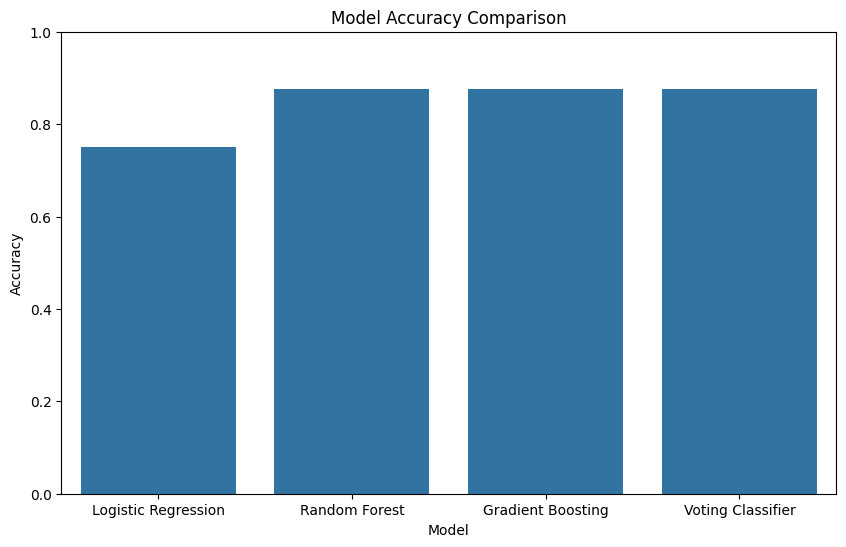

In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xml.etree.ElementTree as ET

# Function to fetch economic data
def fetch_economic_data(url, table_class):
    print(f"Fetching data from {url}...")
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to retrieve data from {url}")
        return None

    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': table_class})

    if table is None:
        print(f"Failed to find the table in the page {url}")
        return None

    headers = [header.get_text() for header in table.find_all('th')]
    rows = []
    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        row_data = [column.get_text().strip() for column in columns]
        rows.append(row_data)

    df = pd.DataFrame(rows, columns=headers)
    return df

# URLs of the pages to scrape data from
urls = {
    "GDP": "https://tradingeconomics.com/country-list/gdp",
    "Inflation Rate": "https://tradingeconomics.com/country-list/inflation-rate",
    "Unemployment Rate": "https://tradingeconomics.com/country-list/unemployment-rate",
    "Interest Rate": "https://tradingeconomics.com/country-list/interest-rate",
    "Government Debt": "https://tradingeconomics.com/country-list/government-debt-to-gdp",
}

# Table class used on TradingEconomics website
table_class = "table table-hover table-heatmap"

# Fetch data for each economic indicator
economic_data = {}
for indicator, url in urls.items():
    df = fetch_economic_data(url, table_class)
    if df is not None:
        economic_data[indicator] = df
        print(f"Data for {indicator} successfully scraped!")
    else:
        print(f"Failed to scrape data for {indicator}")

# Display and inspect the column names and data types of the fetched data
for indicator, df in economic_data.items():
    print(f"\n{indicator} Data Columns and Data Types:")
    print(df.dtypes)
    print(df.head())
    df.to_csv(f"{indicator.replace(' ', '_')}_Data.csv", index=False)

# Function to plot data with dynamic column name handling and numeric conversion
def plot_data(df, title, y_label):
    # Identify the correct column for plotting
    value_column = None
    for column in df.columns:
        if 'Last' in column or 'Value' in column or 'Rate' in column:
            value_column = column
            break

    if value_column is None:
        print(f"No suitable column found for plotting in {title}")
        return

    # Convert the identified column to numeric
    df[value_column] = pd.to_numeric(df[value_column], errors='coerce')

    # Drop rows with NaN values in the identified column
    df = df.dropna(subset=[value_column])

    df.plot(x='Country', y=value_column, kind='bar', legend=False)
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Country')
    plt.xticks(rotation=90)
    plt.show()

# Plot economic data with dynamic column handling and numeric conversion
plot_data(economic_data['GDP'], 'GDP by Country (USD Billion)', 'GDP (USD Billion)')
plot_data(economic_data['Inflation Rate'], 'Inflation Rate by Country (%)', 'Inflation Rate (%)')
plot_data(economic_data['Unemployment Rate'], 'Unemployment Rate by Country (%)', 'Unemployment Rate (%)')
plot_data(economic_data['Interest Rate'], 'Interest Rate by Country (%)', 'Interest Rate (%)')
plot_data(economic_data['Government Debt'], 'Government Debt to GDP by Country (%)', 'Government Debt to GDP (%)')

# Function to scrape BBC business news and perform sentiment analysis using RSS feed
def scrape_bbc_business_news_rss():
    rss_url = "http://feeds.bbci.co.uk/news/business/rss.xml"
    response = requests.get(rss_url)
    root = ET.fromstring(response.content)

    headlines = []
    for item in root.findall('.//item'):
        title = item.find('title').text
        if title:
            headlines.append(title)

    if not headlines:
        print("No headlines found. Exiting the script.")
        return pd.DataFrame()

    data = []
    for headline in headlines:
        sentiment = TextBlob(headline).sentiment
        data.append([headline, sentiment.polarity, sentiment.subjectivity])

    df = pd.DataFrame(data, columns=['Headline', 'Polarity', 'Subjectivity'])
    return df

# Scrape news headlines and perform sentiment analysis
news_df = scrape_bbc_business_news_rss()

# Check if the dataset is empty before proceeding
if news_df.empty:
    print("The dataset is empty. Exiting the script.")
else:
    # Display the data
    print(news_df.head())

    # Visualize sentiment polarity distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(news_df['Polarity'], bins=20, kde=True)
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Create a binary target variable
    news_df['Sentiment'] = news_df['Polarity'].apply(lambda x: 1 if x >= 0 else 0)

    # Create a RAG status based on sentiment polarity
    def classify_sentiment(polarity):
        if polarity > 0.1:
            return 'Green'  # Positive sentiment
        elif polarity < -0.1:
            return 'Red'    # Negative sentiment
        else:
            return 'Amber'  # Neutral sentiment

    news_df['RAG_Status'] = news_df['Polarity'].apply(classify_sentiment)

    # Visualize RAG status distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='RAG_Status', data=news_df, palette=['red', 'orange', 'green'])
    plt.title('RAG Status Distribution')
    plt.xlabel('RAG Status')
    plt.ylabel('Frequency')
    plt.show()

    # Prepare features and target variable for machine learning
    X = news_df[['Polarity', 'Subjectivity']]
    y = news_df['Sentiment']

    # Display the features and target variable
    print("\nFeatures (X):")
    print(X.head())
    print("\nTarget (y):")
    print(y.head())

    # Ensure we have data before proceeding
    if X.empty or y.empty:
        print("Features or target variable is empty. Exiting the script.")
    else:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Initialize and train the logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)

        print(f'Logistic Regression Accuracy: {accuracy}')
        print('Logistic Regression Classification Report:')
        print(report)

        # Plot confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix for Logistic Regression')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Initialize the Random Forest and Gradient Boosting models
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

        # Train the models
        rf_model.fit(X_train, y_train)
        gb_model.fit(X_train, y_train)

        # Make predictions with both models
        rf_pred = rf_model.predict(X_test)
        gb_pred = gb_model.predict(X_test)

        # Evaluate the models
        rf_accuracy = accuracy_score(y_test, rf_pred)
        rf_report = classification_report(y_test, rf_pred)
        gb_accuracy = accuracy_score(y_test, gb_pred)
        gb_report = classification_report(y_test, gb_pred)

        print(f'Random Forest Accuracy: {rf_accuracy}')
        print('Random Forest Classification Report:')
        print(rf_report)

        print(f'Gradient Boosting Accuracy: {gb_accuracy}')
        print('Gradient Boosting Classification Report:')
        print(gb_report)

        # Plot feature importances for Random Forest
        rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
        rf_feature_importances.nlargest(2).plot(kind='barh')
        plt.title('Random Forest Feature Importances')
        plt.show()

        # Create a voting classifier that combines both models
        voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')
        voting_model.fit(X_train, y_train)
        voting_pred = voting_model.predict(X_test)

        # Evaluate the voting model
        voting_accuracy = accuracy_score(y_test, voting_pred)
        voting_report = classification_report(y_test, voting_pred)

        print(f'Voting Classifier Accuracy: {voting_accuracy}')
        print('Voting Classifier Classification Report:')
        print(voting_report)

        # Plot accuracy comparison
        models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Voting Classifier']
        accuracies = [accuracy, rf_accuracy, gb_accuracy, voting_accuracy]

        plt.figure(figsize=(10, 6))
        sns.barplot(x=models, y=accuracies)
        plt.title('Model Accuracy Comparison')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.show()